In [1]:
from google.colab import files

# Upload the dataset
uploaded = files.upload()


Saving diabetes.csv to diabetes.csv


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [4]:
# Load the dataset
data = pd.read_csv('diabetes.csv')

# Display the first few rows
print("Dataset Head:")
print(data.head())

# Print dataset info
print("\nDataset Info:")
print(data.info())

Dataset Head:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   


Missing Values Per Column:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


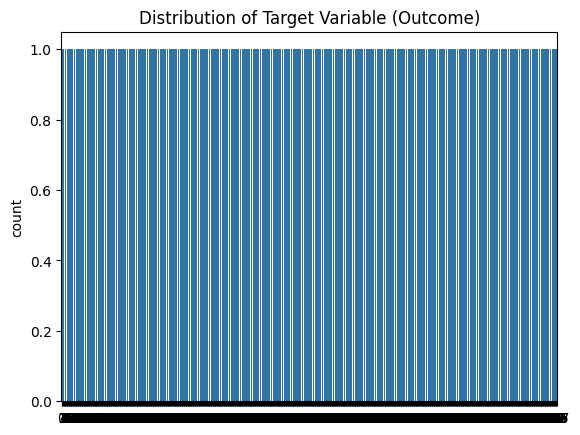

In [5]:
# Check for missing values
print("\nMissing Values Per Column:")
print(data.isnull().sum())

# Plot distribution of the target variable
sns.countplot(data['Outcome'])
plt.title('Distribution of Target Variable (Outcome)')
plt.show()

In [6]:
# Replace zero values in certain columns with NaN
columns_with_zero_values = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_with_zero_values] = data[columns_with_zero_values].replace(0, np.nan)

# Fill missing values with the median of each column
data.fillna(data.median(), inplace=True)

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [7]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [8]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_resampled)

# Normalize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [10]:
# Initialize and train a Gradient Boosting Classifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5]
}
grid_search = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("\nBest Hyperparameters:")
print(grid_search.best_params_)


Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}



Accuracy: 0.8300

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        99
           1       0.78      0.93      0.85       101

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



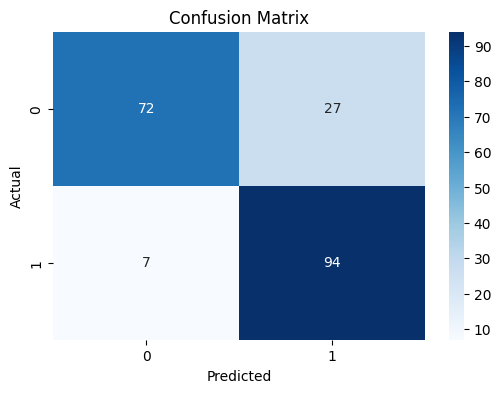

In [11]:
# Predict and evaluate the model
y_pred = grid_search.best_estimator_.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()